# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread('../../metrics_summary/_m/male_specific_DE_4features.txt') %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000135697.9,ENSG00000135697,BCO1,0.5670558,0.0001607398
ENSG00000159958.5,ENSG00000159958,TNFRSF13C,-0.5239497,0.0017744142


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

In [4]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE)
gostres$result %>% 
    data.table::fwrite(file = "DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.001607931,2888,181,55,0.3038674,0.01904432,GO:0051239,GO:BP,regulation of multicellular organismal process,18123,15743,"GO:0032501, GO:0050789"
2,query_1,TRUE,0.011323831,632,181,20,0.1104972,0.03164557,GO:0003013,GO:BP,circulatory system process,18123,1598,GO:0003008


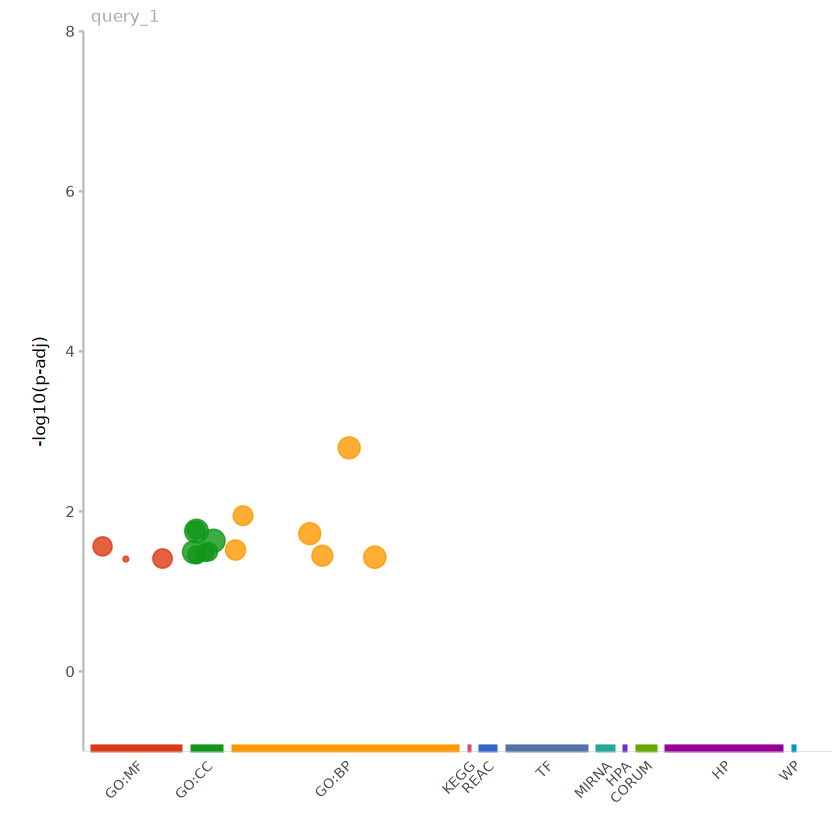

In [5]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("DEGs_manhattan", p, 9, 5)

In [6]:
deg_sz = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_sz$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE)
gostres$result %>% 
    data.table::fwrite(file = "upreg_DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(5)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.04971180,3,18,2,0.11111111,0.66666667,CORUM:6907,CORUM,CTNNB1-FERMT2-TCF7L2 complex,3627,2454,CORUM:0000000
2,query_1,TRUE,0.04971180,3,18,2,0.11111111,0.66666667,CORUM:6908,CORUM,CTNNB1-FERMT2-YBX1 complex,3627,2455,CORUM:0000000
3,query_1,TRUE,0.04179637,178,85,6,0.07058824,0.03370787,GO:0019897,GO:CC,extrinsic component of plasma membrane,18964,983,"GO:0005886, GO:0019898"
4,query_1,TRUE,0.04981401,4,50,2,0.04000000,0.50000000,REAC:R-HSA-9665230,REAC,Drug resistance in ERBB2 KD mutants,10622,735,REAC:R-HSA-1227990
5,query_1,TRUE,0.04981401,4,50,2,0.04000000,0.50000000,REAC:R-HSA-9665737,REAC,Drug resistance in ERBB2 TMD/JMD mutants,10622,736,REAC:R-HSA-1227990


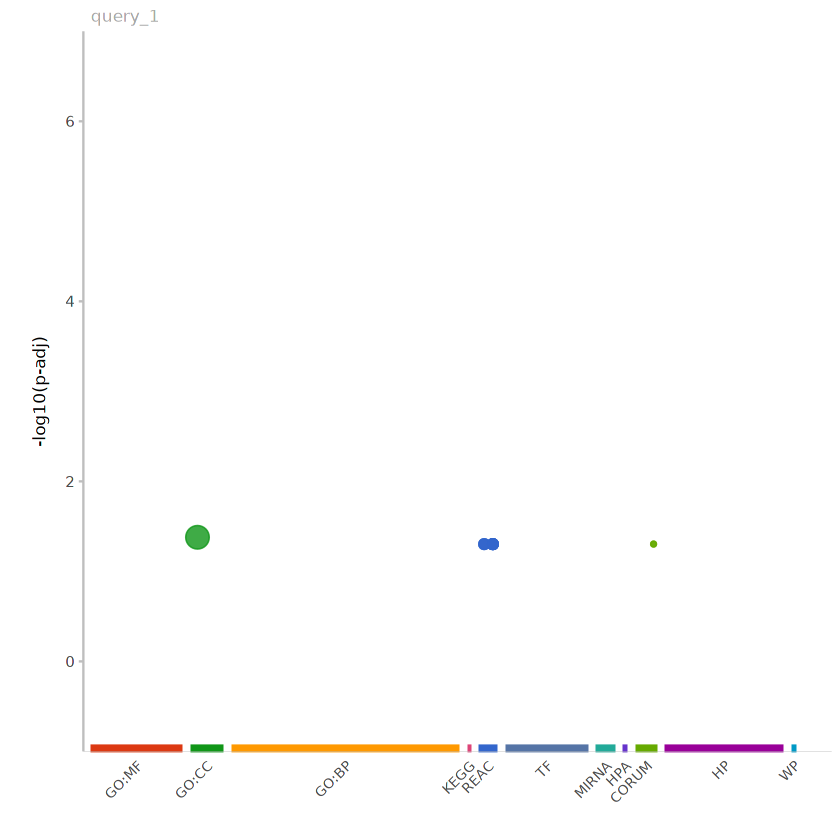

In [7]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("upreg_DEGs_manhattan", p, 9, 5)

In [8]:
deg_ctl = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_ctl$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE) 
gostres$result %>% 
    data.table::fwrite(file = "downreg_DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.006625807,654,102,15,0.1470588,0.02293578,GO:0006935,GO:BP,chemotaxis,18123,2886,"GO:0042221, GO:0042330"
2,query_1,TRUE,0.007004520,657,102,15,0.1470588,0.02283105,GO:0042330,GO:BP,taxis,18123,11707,"GO:0009605, GO:0040011"


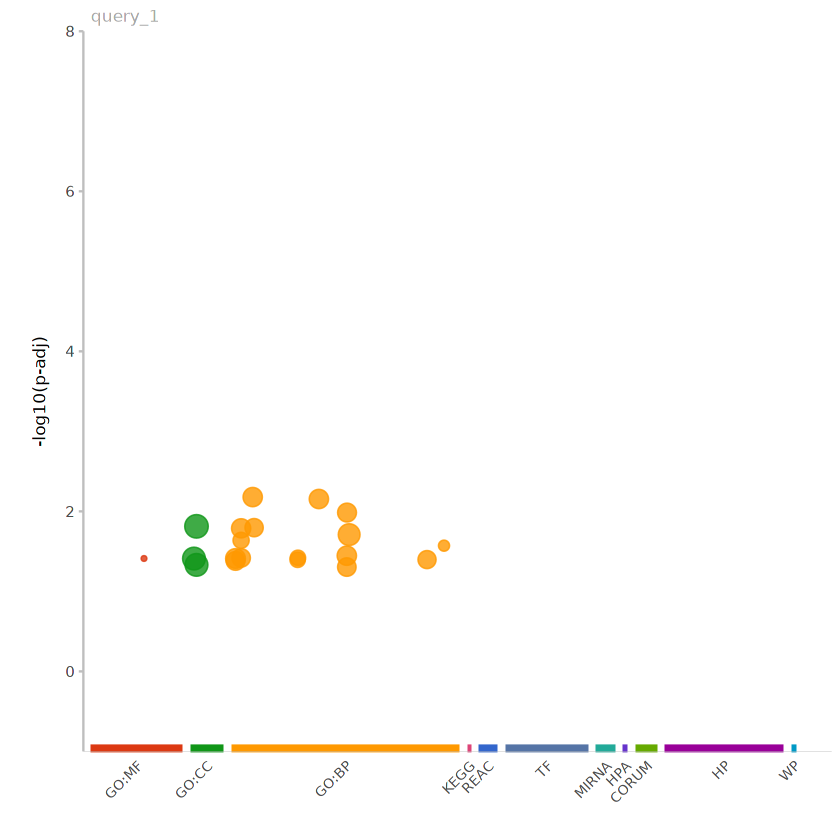

In [9]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("downreg_DEGs_manhattan", p, 9, 5)

## Reproducibility Information

In [10]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-07-14 18:00:49 EDT"

   user  system elapsed 
  8.548   0.280  15.828 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-07-14                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 bitops        1.0-7    2021-04-24 [1] CRAN (R 4.0.3)
 broom         0.7.8    2021-06-24 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 